## Park_HeeJi_HW05.ipynb
- Student Name: Hee Ji Park
- Github username : heejipark 
- USC ID: 4090715830
- Contact Email: heejipar@usc.edu

### Required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree
import graphviz 
from graphviz import Source
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from xgboost import XGBRegressor

### 1. Decision Trees as Interpretable Models

#### (a) Download the Acute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations.
    - ./../data/diagnosis.data
    - ./../data/diagnosis.names
    

#####  Acute Inflammations
- Abstract: The data was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system.


##### Attribute Information:
For example, '35,9 no no yes yes yes yes no' <Br>
Where:
- '35,9' Temperature of patient { 35C-42C }
- 'no' Occurrence of nausea { yes, no } 
- 'no' Lumbar pain { yes, no } 
- 'yes' Urine pushing (continuous need for urination) { yes, no } 
- 'yes' Micturition pains { yes, no } 
- 'yes' Burning of urethra, itch, swelling of urethra outlet { yes, no } 
- 'yes' decision: Inflammation of urinary bladder { yes, no } 
- 'no' decision: Nephritis of renal pelvis origin { yes, no } 


In [2]:
df = pd.read_csv('./../data/diagnosis.data', sep='\t', encoding= 'utf-16', header=None)
columns = ['Temperature','Occurrence_of_nausea', 'Lumbar_pain', 'Urine_pushing','Micturition_pains', 
           'Burning_of_urethra_itch_swelling','decision_Inflammation','decision_Nephritis']
df.columns = columns
df['Temperature'] = df['Temperature'].str.replace(',','.').astype(float)
df

Temperature Occurrence_of_nausea Lumbar_pain Urine_pushing  \
0           35.5                   no         yes            no   
1           35.9                   no          no           yes   
2           35.9                   no         yes            no   
3           36.0                   no          no           yes   
4           36.0                   no         yes            no   
..           ...                  ...         ...           ...   
115         41.4                   no         yes           yes   
116         41.5                   no          no            no   
117         41.5                  yes         yes            no   
118         41.5                   no         yes           yes   
119         41.5                   no         yes           yes   

    Micturition_pains Burning_of_urethra_itch_swelling decision_Inflammation  \
0                  no                               no                    no   
1                 yes                              yes                   yes   
2                  no                               no                    no   
3                 yes                              yes                   yes   
4                  no                               no                    no   
..                ...                              ...                   ...   
115                no                              yes                    no   
116                no                               no                    no   
117               yes                               no                    no   
118                no                              yes                    no   
119                no                              yes                    no   

    decision_Nephritis  
0                   no  
1                   no  
2                   no  
3                   no  
4                   no  
..                 ...  
115                yes  
116                 no  
117                yes  
118                yes  
119                yes  

[120 rows x 8 columns]

In [3]:
df = df.replace('no','0')
df = df.replace('yes','1')
df

Temperature Occurrence_of_nausea Lumbar_pain Urine_pushing  \
0           35.5                    0           1             0   
1           35.9                    0           0             1   
2           35.9                    0           1             0   
3           36.0                    0           0             1   
4           36.0                    0           1             0   
..           ...                  ...         ...           ...   
115         41.4                    0           1             1   
116         41.5                    0           0             0   
117         41.5                    1           1             0   
118         41.5                    0           1             1   
119         41.5                    0           1             1   

    Micturition_pains Burning_of_urethra_itch_swelling decision_Inflammation  \
0                   0                                0                     0   
1                   1                                1                     1   
2                   0                                0                     0   
3                   1                                1                     1   
4                   0                                0                     0   
..                ...                              ...                   ...   
115                 0                                1                     0   
116                 0                                0                     0   
117                 1                                0                     0   
118                 0                                1                     0   
119                 0                                1                     0   

    decision_Nephritis  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
..                 ...  
115                  1  
116                  0  
117                  1  
118                  1  
119                  1  

[120 rows x 8 columns]

#### (b) Build a decision tree on the whole data set and plot it.

In [4]:
X = df.iloc[:,0:5]
y = df.iloc[:,6:8]
# Build decision tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4, 0.9, 'Temperature <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'Urine_pushing <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'Lumbar_pain <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'Occurrence_of_nausea <= 0.5\nentropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'Urine_pushing <= 0.5\nentropy = 0.465\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

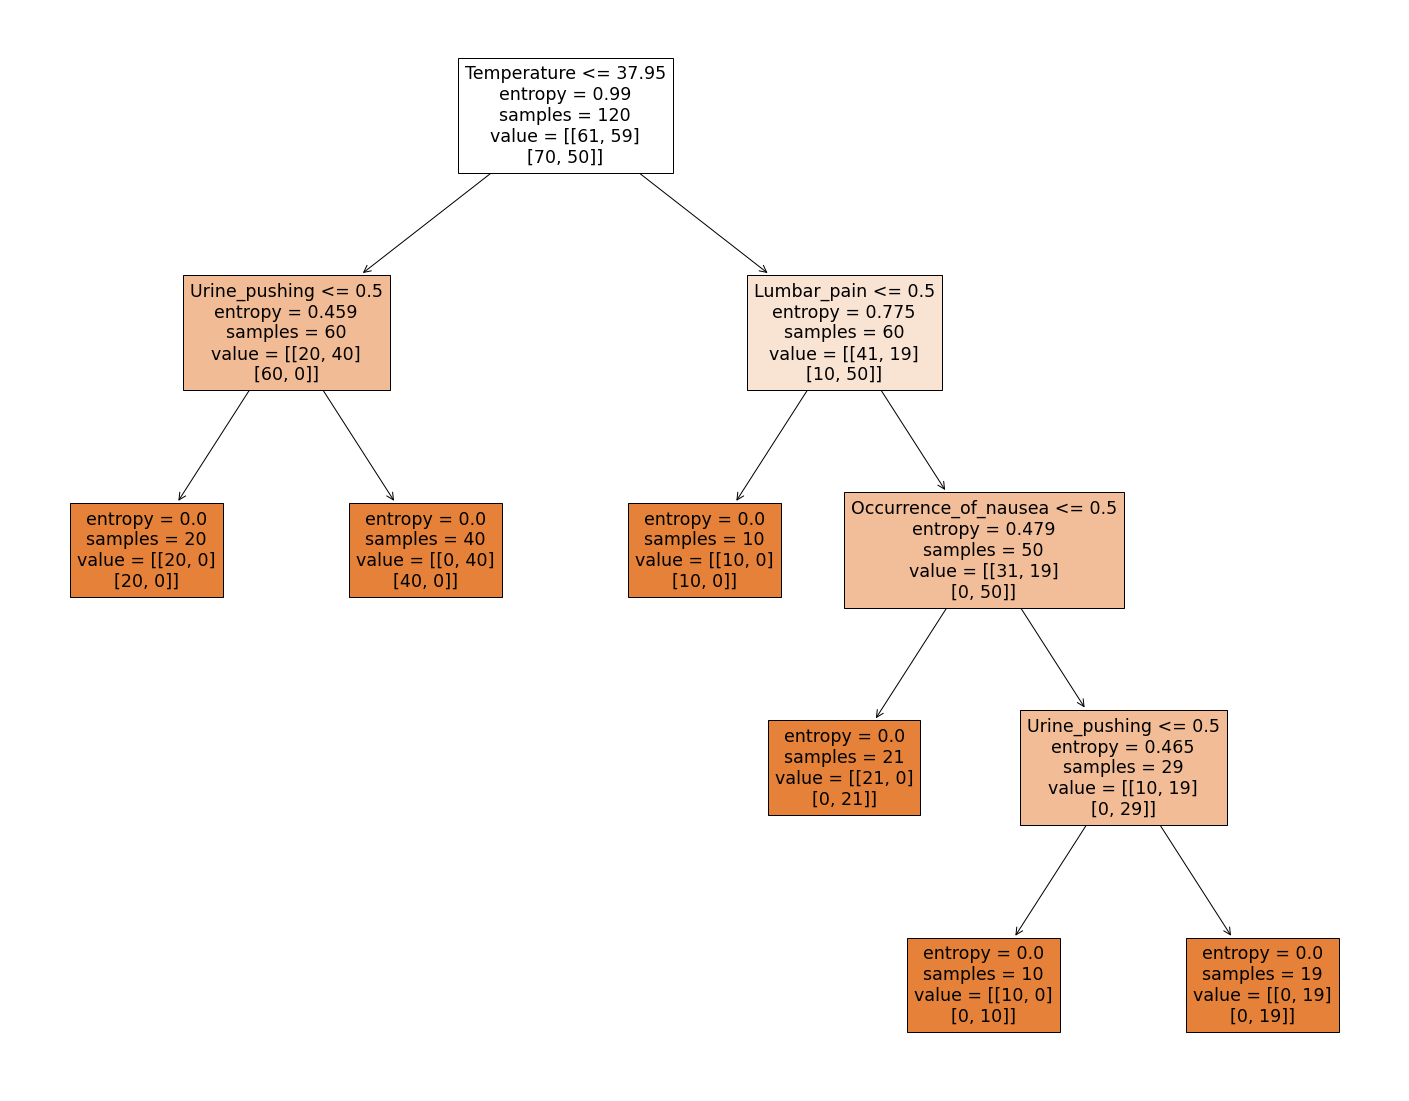

In [5]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt, feature_names=columns[:5],  
                   class_names=columns[6:8],
                   filled=True)

In [6]:
dotfile = open("dt.dot", 'w')
dot_data = tree.export_graphviz(dt, out_file=dotfile, feature_names=columns[:5])
dotfile.close()

#### (c) Convert the decision rules into a set of IF-THEN rules.

In [7]:
from sklearn.tree import _tree

def tree_to_code(treeModel, feature_names):

    '''
    Outputs a decision tree model as a Python function

    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as a function
        feature_names: list
        The feature names of the dataset used for building the decision tree
    '''

    tree_ = treeModel.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [8]:
tree_to_code(dt, columns[:5])

def tree(Temperature, Occurrence_of_nausea, Lumbar_pain, Urine_pushing, Micturition_pains):
  if Temperature <= 37.95000076293945:
    if Urine_pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine_pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar_pain > 0.5
      if Occurrence_of_nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Occurrence_of_nausea > 0.5
        if Urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


#### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

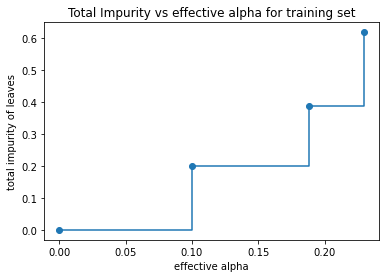

In [9]:
path = dt.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

<b>Answer : </b> 
- As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [10]:
from sklearn.model_selection import cross_val_score
# prune the tree with cost complexity pruning — Alpha
path = dt.cost_complexity_pruning_path(X, y)
alphas, impurities = path.ccp_alphas, path.impurities
mean1, std1 = [], []
mean2, std2 = [], []

for i in alphas:
    prunTree = tree.DecisionTreeClassifier(ccp_alpha=i, criterion='entropy')
    # 5 fold cross validation for each alpha value
    prunTree.fit(X, y)
    y_pred = prunTree.predict(X)
    pred_Inflammation = [row[0] for row in y_pred]
    pred_Nephritis = [row[1] for row in y_pred]
    scores = cross_val_score(prunTree, X, pred_Inflammation, cv=5)
    scores2 = cross_val_score(prunTree, X, pred_Nephritis, cv=5)
    mean1.append(scores.mean())
    mean2.append(scores2.mean())
    std1.append(scores.std())
    std2.append(scores2.std())
    

# keep a record of the values of alpha, mean accuracy rate, standard deviation of accuracies
evaluation = pd.DataFrame({'alpha': alphas, 'impurities':impurities,'score_mean': mean1, 'score_std': std1, 'score_mean2':mean2, 'score_std2':std2})
evaluation = evaluation.sort_values(['score_mean', 'score_mean2'], ascending = False)
evaluation.head(10)

alpha  impurities  score_mean  score_std  score_mean2  score_std2
4  0.372575    0.989834    1.000000   0.000000     1.000000    0.000000
2  0.188093    0.387686    1.000000   0.000000     0.900000    0.125277
1  0.099796    0.199592    1.000000   0.000000     0.858333    0.177951
0  0.000000    0.000000    0.966667   0.066667     0.858333    0.177951
3  0.229574    0.617259    0.900000   0.125277     0.900000    0.125277

<b>Answer : </b>
- The model with the best accuracy performance seems to have α = 0.372575, however, the impuritiest is too high, I have excluded this alpha.

- Considering impurities as well as accuracy, I decided to use alpha 0.188093. Therefore, I will apply the alpha  '0.188093' below.

[Text(0.5, 0.8333333333333334, 'Temperature <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.25, 0.5, 'Lumbar_pain <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.75, 0.5, 'Lumbar_pain <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]')]

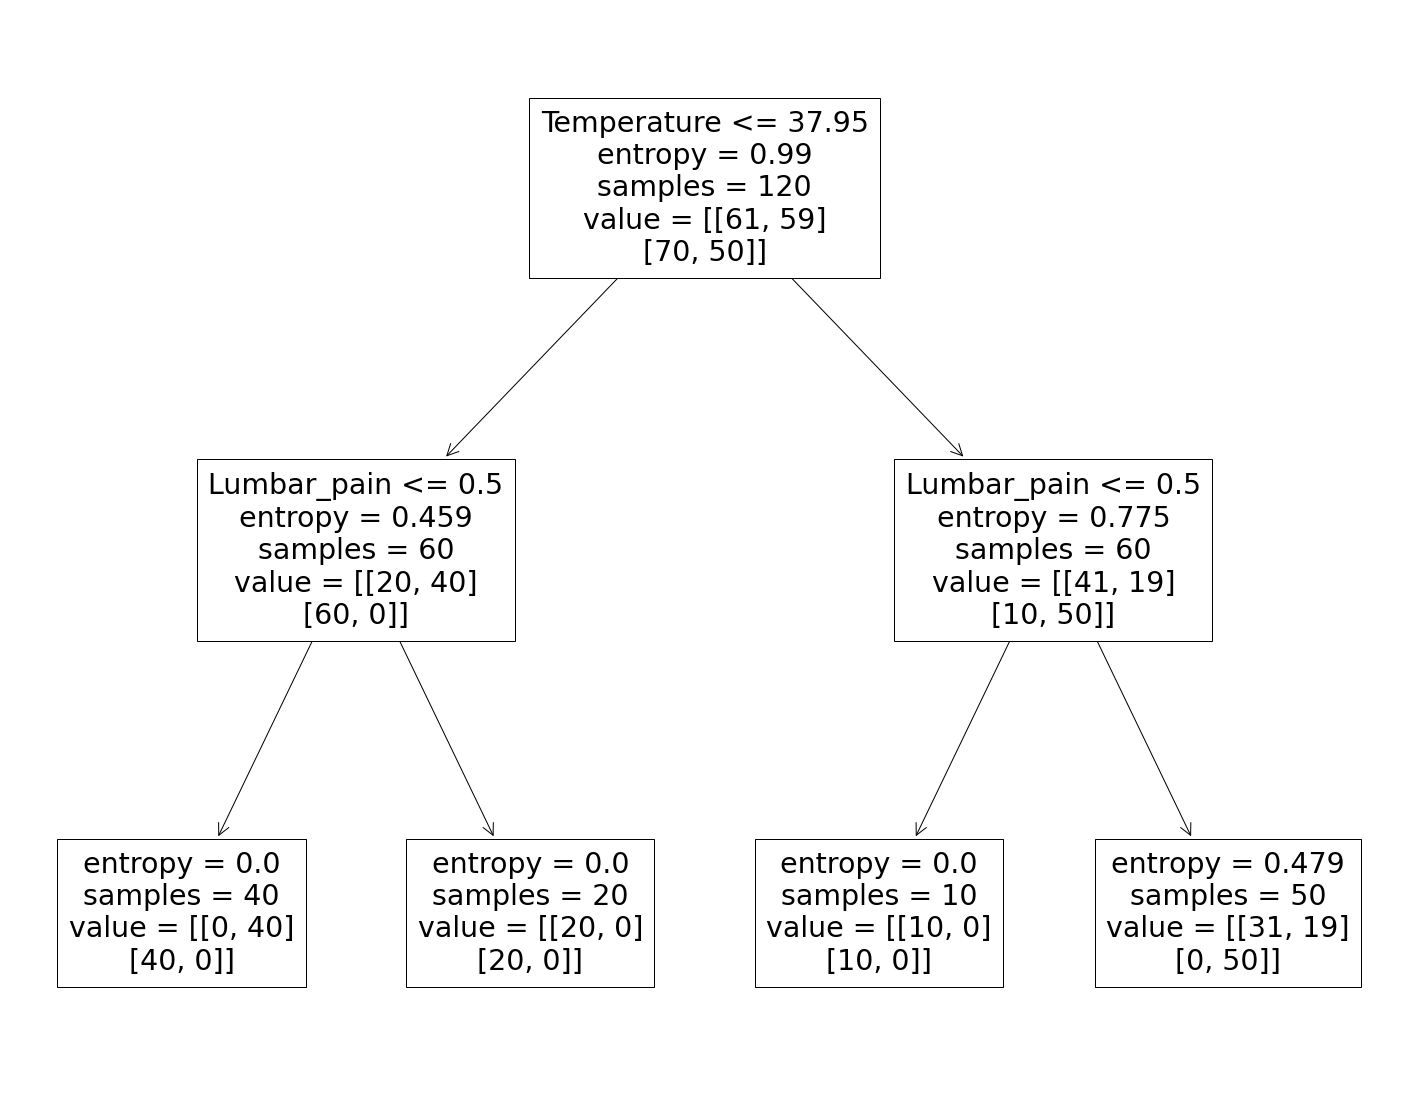

In [11]:
# fit the pruned tree - cv
prunedTree = tree.DecisionTreeClassifier(ccp_alpha=0.188093, criterion='entropy')
prunedTree.fit(X, y)

fig = plt.figure(figsize=(25,20))
tree.plot_tree(prunedTree, feature_names=columns[:5],  
               class_names=columns[6:8])

<hr>

### 2. The LASSO and Boosting for Regression

#### (a) Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.
    - ./../data/communities.data
    - ./../data/communities.name
    - I'll split the train and test set after (e) step.

In [12]:
features = """@attribute state numeric
    @attribute county numeric
    @attribute community numeric
    @attribute communityname string
    @attribute fold numeric
    @attribute population numeric
    @attribute householdsize numeric
    @attribute racepctblack numeric
    @attribute racePctWhite numeric
    @attribute racePctAsian numeric
    @attribute racePctHisp numeric
    @attribute agePct12t21 numeric
    @attribute agePct12t29 numeric
    @attribute agePct16t24 numeric
    @attribute agePct65up numeric
    @attribute numbUrban numeric
    @attribute pctUrban numeric
    @attribute medIncome numeric
    @attribute pctWWage numeric
    @attribute pctWFarmSelf numeric
    @attribute pctWInvInc numeric
    @attribute pctWSocSec numeric
    @attribute pctWPubAsst numeric
    @attribute pctWRetire numeric
    @attribute medFamInc numeric
    @attribute perCapInc numeric
    @attribute whitePerCap numeric
    @attribute blackPerCap numeric
    @attribute indianPerCap numeric
    @attribute AsianPerCap numeric
    @attribute OtherPerCap numeric
    @attribute HispPerCap numeric
    @attribute NumUnderPov numeric
    @attribute PctPopUnderPov numeric
    @attribute PctLess9thGrade numeric
    @attribute PctNotHSGrad numeric
    @attribute PctBSorMore numeric
    @attribute PctUnemployed numeric
    @attribute PctEmploy numeric
    @attribute PctEmplManu numeric
    @attribute PctEmplProfServ numeric
    @attribute PctOccupManu numeric
    @attribute PctOccupMgmtProf numeric
    @attribute MalePctDivorce numeric
    @attribute MalePctNevMarr numeric
    @attribute FemalePctDiv numeric
    @attribute TotalPctDiv numeric
    @attribute PersPerFam numeric
    @attribute PctFam2Par numeric
    @attribute PctKids2Par numeric
    @attribute PctYoungKids2Par numeric
    @attribute PctTeen2Par numeric
    @attribute PctWorkMomYoungKids numeric
    @attribute PctWorkMom numeric
    @attribute NumIlleg numeric
    @attribute PctIlleg numeric
    @attribute NumImmig numeric
    @attribute PctImmigRecent numeric
    @attribute PctImmigRec5 numeric
    @attribute PctImmigRec8 numeric
    @attribute PctImmigRec10 numeric
    @attribute PctRecentImmig numeric
    @attribute PctRecImmig5 numeric
    @attribute PctRecImmig8 numeric
    @attribute PctRecImmig10 numeric
    @attribute PctSpeakEnglOnly numeric
    @attribute PctNotSpeakEnglWell numeric
    @attribute PctLargHouseFam numeric
    @attribute PctLargHouseOccup numeric
    @attribute PersPerOccupHous numeric
    @attribute PersPerOwnOccHous numeric
    @attribute PersPerRentOccHous numeric
    @attribute PctPersOwnOccup numeric
    @attribute PctPersDenseHous numeric
    @attribute PctHousLess3BR numeric
    @attribute MedNumBR numeric
    @attribute HousVacant numeric
    @attribute PctHousOccup numeric
    @attribute PctHousOwnOcc numeric
    @attribute PctVacantBoarded numeric
    @attribute PctVacMore6Mos numeric
    @attribute MedYrHousBuilt numeric
    @attribute PctHousNoPhone numeric
    @attribute PctWOFullPlumb numeric
    @attribute OwnOccLowQuart numeric
    @attribute OwnOccMedVal numeric
    @attribute OwnOccHiQuart numeric
    @attribute RentLowQ numeric
    @attribute RentMedian numeric
    @attribute RentHighQ numeric
    @attribute MedRent numeric
    @attribute MedRentPctHousInc numeric
    @attribute MedOwnCostPctInc numeric
    @attribute MedOwnCostPctIncNoMtg numeric
    @attribute NumInShelters numeric
    @attribute NumStreet numeric
    @attribute PctForeignBorn numeric
    @attribute PctBornSameState numeric
    @attribute PctSameHouse85 numeric
    @attribute PctSameCity85 numeric
    @attribute PctSameState85 numeric
    @attribute LemasSwornFT numeric
    @attribute LemasSwFTPerPop numeric
    @attribute LemasSwFTFieldOps numeric
    @attribute LemasSwFTFieldPerPop numeric
    @attribute LemasTotalReq numeric
    @attribute LemasTotReqPerPop numeric
    @attribute PolicReqPerOffic numeric
    @attribute PolicPerPop numeric
    @attribute RacialMatchCommPol numeric
    @attribute PctPolicWhite numeric
    @attribute PctPolicBlack numeric
    @attribute PctPolicHisp numeric
    @attribute PctPolicAsian numeric
    @attribute PctPolicMinor numeric
    @attribute OfficAssgnDrugUnits numeric
    @attribute NumKindsDrugsSeiz numeric
    @attribute PolicAveOTWorked numeric
    @attribute LandArea numeric
    @attribute PopDens numeric
    @attribute PctUsePubTrans numeric
    @attribute PolicCars numeric
    @attribute PolicOperBudg numeric
    @attribute LemasPctPolicOnPatr numeric
    @attribute LemasGangUnitDeploy numeric
    @attribute LemasPctOfficDrugUn numeric
    @attribute PolicBudgPerPop numeric
    @attribute ViolentCrimesPerPop numeric 
"""
features = features.replace('@attribute ', '')
features = features.replace(' numeric\n', '')
features = features.replace(' numeric \n', '')
features = features.replace(' string\n', '')
features = features.split('    ')

In [13]:
df = pd.read_csv('./../data/communities.data', sep=',', header=None, na_values=['?'])
df.columns = features
df.head(10)

state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   
5      6     NaN        NaN    SouthPasadenacity     1        0.02   
6     44     7.0    41500.0          Lincolntown     1        0.01   
7      6     NaN        NaN            Selmacity     1        0.01   
8     21     NaN        NaN        Hendersoncity     1        0.03   
9     29     NaN        NaN          Claytoncity     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   
5           0.28          0.06          0.54          1.00  ...      0.01   
6           0.39          0.00          0.98          0.06  ...      0.05   
7           0.74          0.03          0.46          0.20  ...      0.01   
8           0.34          0.20          0.84          0.02  ...      0.04   
9           0.40          0.06          0.87          0.30  ...      0.00   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45        NaN            NaN                  NaN   
2     0.21            0.02        NaN            NaN                  NaN   
3     0.39            0.28        NaN            NaN                  NaN   
4     0.09            0.02        NaN            NaN                  NaN   
5     0.58            0.10        NaN            NaN                  NaN   
6     0.08            0.06        NaN            NaN                  NaN   
7     0.33            0.00        NaN            NaN                  NaN   
8     0.17            0.04        NaN            NaN                  NaN   
9     0.47            0.11        NaN            NaN                  NaN   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                  NaN                 0.00              NaN   
2                  NaN                 0.00              NaN   
3                  NaN                 0.00              NaN   
4                  NaN                 0.00              NaN   
5                  NaN                 0.00              NaN   
6                  NaN                 0.00              NaN   
7                  NaN                 0.00              NaN   
8                  NaN                 0.00              NaN   
9                  NaN                 0.00              NaN   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  
5                 0.14  
6                 0.03  
7                 0.55  
8                 0.53  
9                 0.15  

[10 rows x 128 columns]

#### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

- The features 'state', 'county', 'community', 'communityname', 'fold' are non-predictive, so when I use a data imputation techinique, I'll ignore those features.

- I will use a data imputation technique that fills in the mean of each column.

In [14]:
df.iloc[:,5:] = df.iloc[:,5:].fillna(df.mean(numeric_only=True)) # Use a data imputation technique that fills in the mean of each column.
df.head(10)

state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   
5      6     NaN        NaN    SouthPasadenacity     1        0.02   
6     44     7.0    41500.0          Lincolntown     1        0.01   
7      6     NaN        NaN            Selmacity     1        0.01   
8     21     NaN        NaN        Hendersoncity     1        0.03   
9     29     NaN        NaN          Claytoncity     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   
5           0.28          0.06          0.54          1.00  ...      0.01   
6           0.39          0.00          0.98          0.06  ...      0.05   
7           0.74          0.03          0.46          0.20  ...      0.01   
8           0.34          0.20          0.84          0.02  ...      0.04   
9           0.40          0.06          0.87          0.30  ...      0.00   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20   0.060000       0.040000             0.900000   
1     0.12            0.45   0.163103       0.076708             0.698589   
2     0.21            0.02   0.163103       0.076708             0.698589   
3     0.39            0.28   0.163103       0.076708             0.698589   
4     0.09            0.02   0.163103       0.076708             0.698589   
5     0.58            0.10   0.163103       0.076708             0.698589   
6     0.08            0.06   0.163103       0.076708             0.698589   
7     0.33            0.00   0.163103       0.076708             0.698589   
8     0.17            0.04   0.163103       0.076708             0.698589   
9     0.47            0.11   0.163103       0.076708             0.698589   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0             0.500000                 0.32         0.140000   
1             0.440439                 0.00         0.195078   
2             0.440439                 0.00         0.195078   
3             0.440439                 0.00         0.195078   
4             0.440439                 0.00         0.195078   
5             0.440439                 0.00         0.195078   
6             0.440439                 0.00         0.195078   
7             0.440439                 0.00         0.195078   
8             0.440439                 0.00         0.195078   
9             0.440439                 0.00         0.195078   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  
5                 0.14  
6                 0.03  
7                 0.55  
8                 0.53  
9                 0.15  

[10 rows x 128 columns]

#### (c) Plot a correlation matrix for the features in the data set

In [15]:
# Type 1 - correlation matrix
corr = df.corr() # Calculates correlation matrix
corr.style.background_gradient(cmap='coolwarm')

<AxesSubplot:>

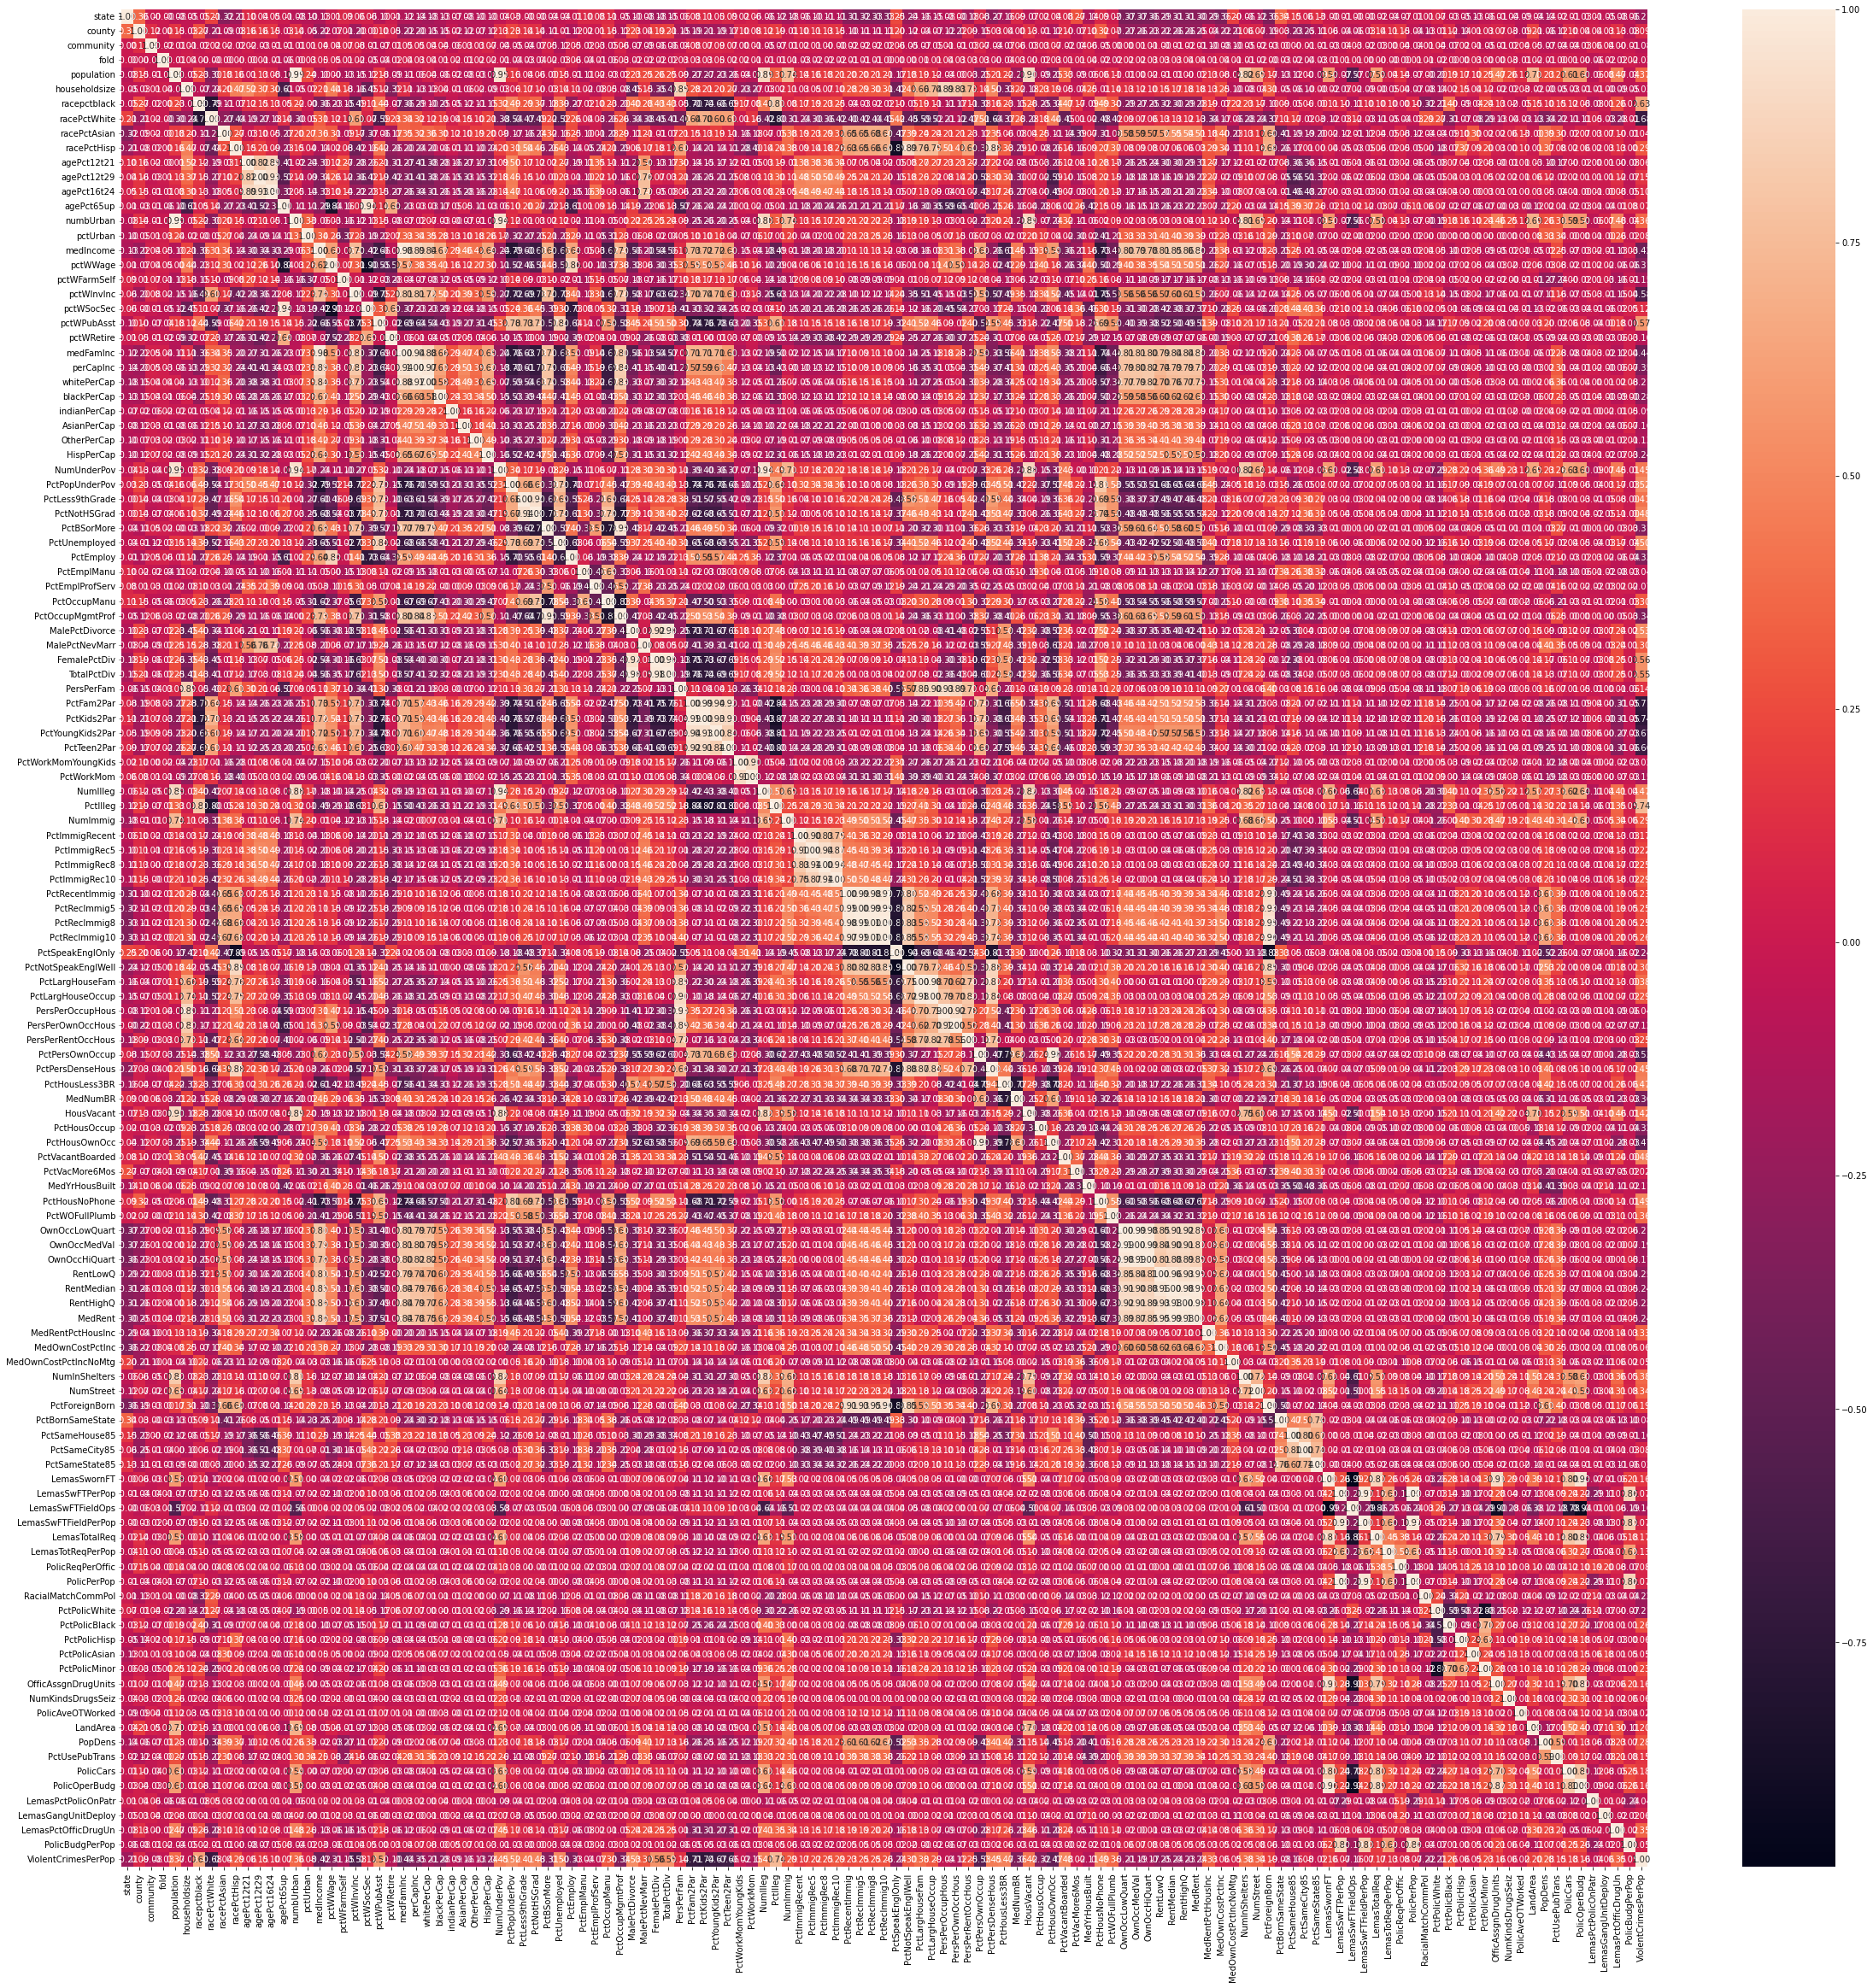

In [16]:
# Type 2 - correlation matrix using seaborn

fig = plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

#### (d) Calculate the Coefficient of VariationCV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean.

In [17]:
df2 = df.iloc[:,5:]
cv =  lambda x: np.std(x) / np.mean(x)
var = df2.apply(cv)
var

population             2.202950
householdsize          0.353210
racepctblack           1.410567
racePctWhite           0.323700
racePctAsian           1.358821
                         ...   
LemasPctPolicOnPatr    0.122301
LemasGangUnitDeploy    0.367948
LemasPctOfficDrugUn    2.554625
PolicBudgPerPop        0.337196
ViolentCrimesPerPop    0.978769
Length: 123, dtype: float64

#### (e) Pick [√128] features with highest CV, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [18]:
FeatureSignificant = pd.DataFrame(list(zip(features[5:], var)), columns=['feature','coefficient']).sort_values(by='coefficient', ascending=False)
FeatureSignificant

feature  coefficient
90             NumStreet     4.406597
89         NumInShelters     3.484607
49              NumIlleg     2.993446
51              NumImmig     2.899770
120  LemasPctOfficDrugUn     2.554625
..                   ...          ...
111    NumKindsDrugsSeiz     0.145919
104   RacialMatchCommPol     0.131384
118  LemasPctPolicOnPatr     0.122301
105        PctPolicWhite     0.121629
98     LemasSwFTFieldOps     0.057112

[123 rows x 2 columns]

#### Pick only 11 features  (= √128)

In [19]:
# Pick 11 features
picked = FeatureSignificant[:11].reset_index(drop=True)
picked

feature  coefficient
0             NumStreet     4.406597
1         NumInShelters     3.484607
2              NumIlleg     2.993446
3              NumImmig     2.899770
4   LemasPctOfficDrugUn     2.554625
5           NumUnderPov     2.304392
6            population     2.202950
7             numbUrban     2.001242
8            HousVacant     1.958288
9              LandArea     1.677611
10          racePctHisp     1.613873

#### Scatter plot

In [20]:
featureDF = df.loc[:, list(picked['feature'])]
featureDF.head()

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0        0.0           0.04      0.04      0.03                 0.32   
1        0.0           0.00      0.00      0.01                 0.00   
2        0.0           0.00      0.01      0.00                 0.00   
3        0.0           0.00      0.03      0.02                 0.00   
4        0.0           0.00      0.00      0.00                 0.00   

   NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0         0.08        0.19       0.20        0.21      0.12         0.17  
1         0.01        0.00       0.02        0.02      0.02         0.07  
2         0.01        0.00       0.00        0.01      0.01         0.04  
3         0.01        0.04       0.06        0.01      0.02         0.10  
4         0.00        0.01       0.02        0.01      0.04         0.05

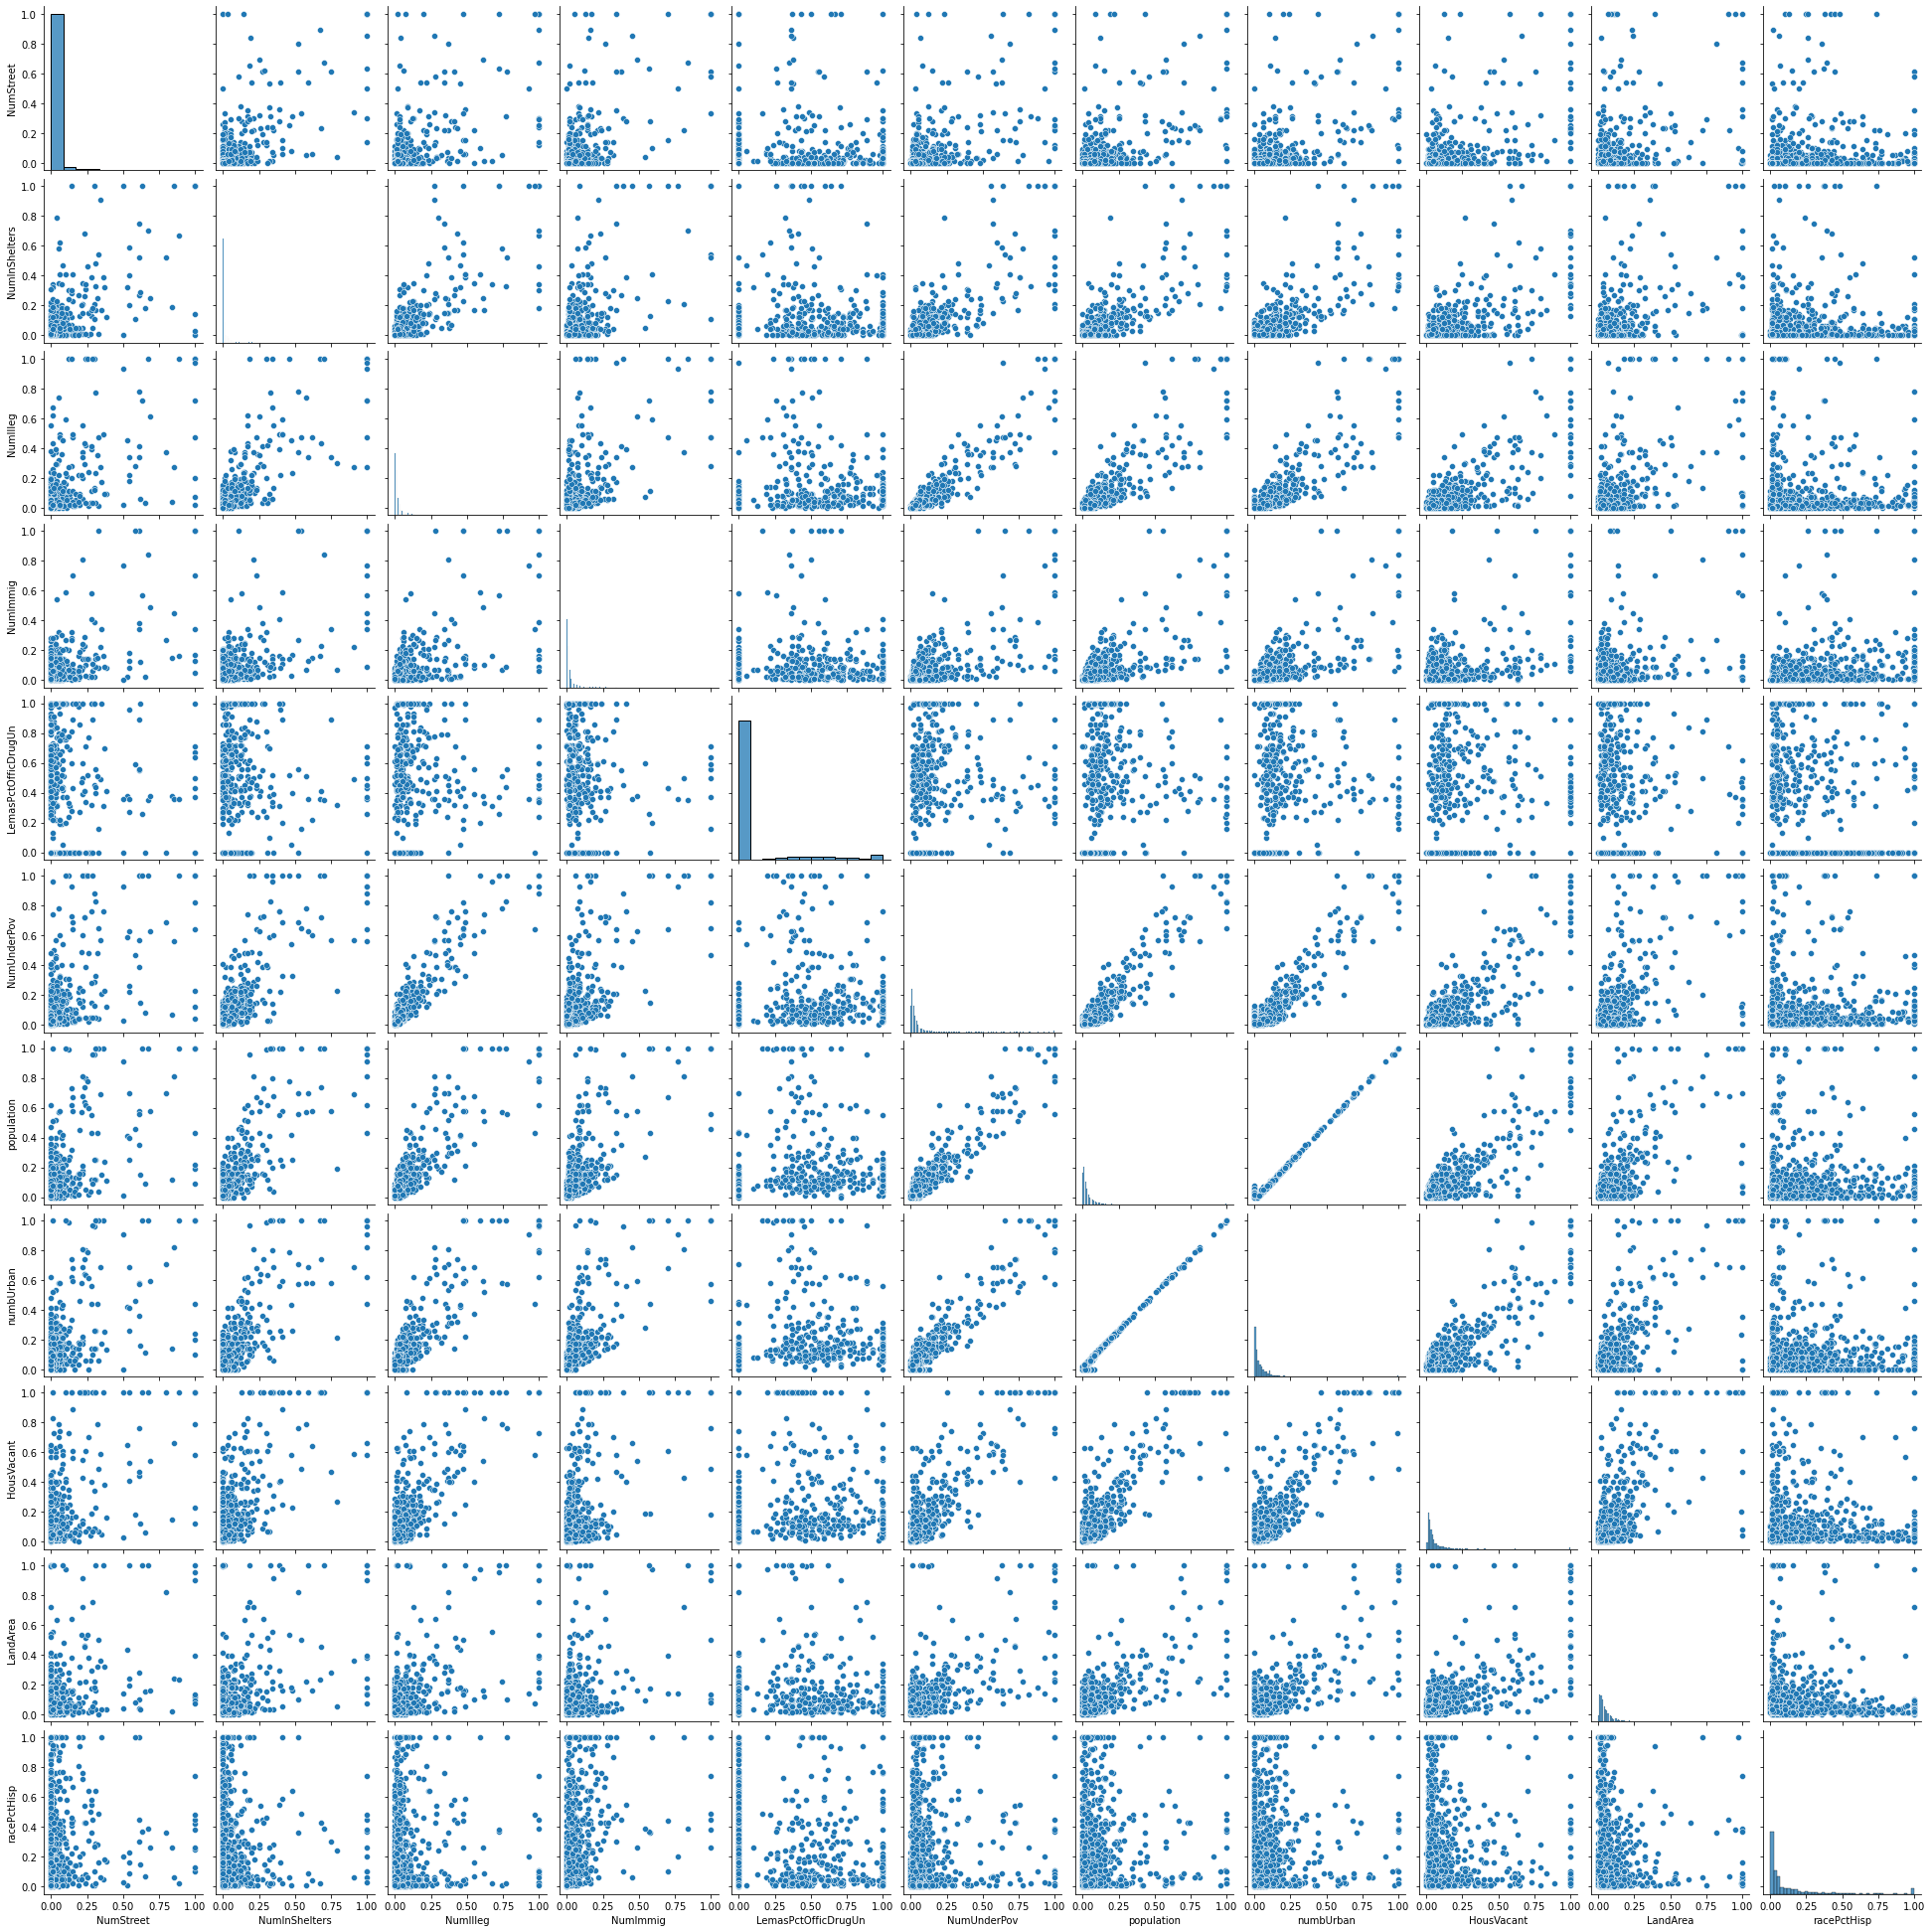

In [21]:
sns.pairplot(featureDF)

<b> Answer </b>:
- By just drawing the scatter plots, we can find significant features. 
      - The relationship between 'numbUrban' and 'population' has a strong positive relationship.
      - The relationship between 'NumUnderPov' and 'population' also seems to have a weak positive relationship.
      - The relationship between 'NumUnderPov' and 'numbUrban' also seems to have a weak positive relationship.

#### box plot

In [22]:
featureDF.head()

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0        0.0           0.04      0.04      0.03                 0.32   
1        0.0           0.00      0.00      0.01                 0.00   
2        0.0           0.00      0.01      0.00                 0.00   
3        0.0           0.00      0.03      0.02                 0.00   
4        0.0           0.00      0.00      0.00                 0.00   

   NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0         0.08        0.19       0.20        0.21      0.12         0.17  
1         0.01        0.00       0.02        0.02      0.02         0.07  
2         0.01        0.00       0.00        0.01      0.01         0.04  
3         0.01        0.04       0.06        0.01      0.02         0.10  
4         0.00        0.01       0.02        0.01      0.04         0.05

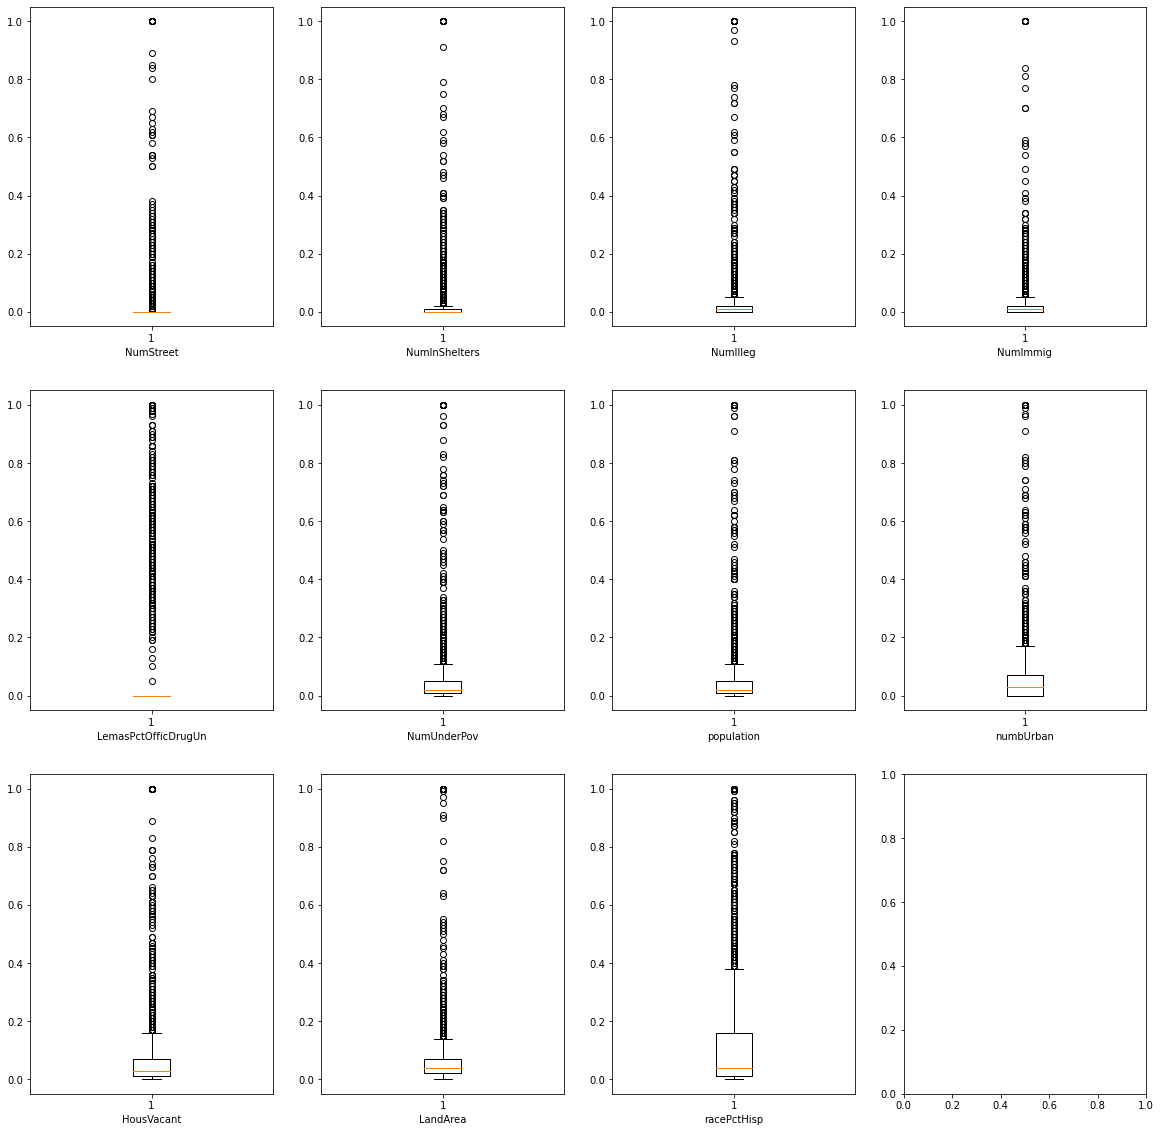

In [23]:
import math
i, j = 0, 0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(math.ceil(len(featureDF.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 20))
for col in featureDF.columns:
    axs[i][j].boxplot(featureDF[col])
    axs[i][j].set_xlabel(col)
    j+=1
    if j % PLOTS_PER_ROW==0:
        i += 1
        j = 0
plt.show()

#### Before fitting the modeling, I'll split the dataset. I'll use the first 1495 rows of data as the training set and the rest as the test set.

In [24]:
trainX, trainY = df.iloc[:1495,5:127], df.iloc[:1495,127]
testX, testY = df.iloc[1495:,5:127], df.iloc[1495:,127]

In [25]:
trainX

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1490        0.00           0.59          0.01          0.69          1.00   
1491        0.16           0.62          0.03          0.74          0.48   
1492        0.01           0.36          0.95          0.24          0.03   
1493        0.06           0.53          0.01          0.98          0.05   
1494        0.05           0.43          0.08          0.65          0.12   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.17         0.34         0.47         0.29        0.32  ...   
1            0.07         0.26         0.59         0.35        0.27  ...   
2            0.04         0.39         0.47         0.28        0.32  ...   
3            0.10         0.51         0.50         0.34        0.21  ...   
4            0.05         0.38         0.38         0.23        0.36  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.07         0.41         0.28         0.23        0.57  ...   
1491         0.42         0.44         0.57         0.40        0.25  ...   
1492         0.01         0.44         0.42         0.27        0.63  ...   
1493         0.01         0.40         0.40         0.24        0.29  ...   
1494         1.00         0.37         0.52         0.33        0.44  ...   

      PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0             0.290000      0.12     0.26            0.20   0.060000   
1             0.305987      0.02     0.12            0.45   0.163103   
2             0.305987      0.01     0.21            0.02   0.163103   
3             0.305987      0.02     0.39            0.28   0.163103   
4             0.305987      0.04     0.09            0.02   0.163103   
...                ...       ...      ...             ...        ...   
1490          0.305987      0.02     0.14            0.22   0.163103   
1491          0.380000      0.07     0.40            0.14   0.070000   
1492          0.305987      0.03     0.12            0.01   0.163103   
1493          0.305987      0.08     0.15            0.02   0.163103   
1494          0.480000      0.00     1.00            1.00   0.000000   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0          0.040000             0.900000             0.500000   
1          0.076708             0.698589             0.440439   
2          0.076708             0.698589             0.440439   
3          0.076708             0.698589             0.440439   
4          0.076708             0.698589             0.440439   
...             ...                  ...                  ...   
1490       0.076708             0.698589             0.440439   
1491       0.050000             0.850000             0.500000   
1492       0.076708             0.698589             0.440439   
1493       0.076708             0.698589             0.440439   
1494       0.010000             0.770000             0.000000   

      LemasPctOfficDrugUn  PolicBudgPerPop  
0                    0.32         0.140000  
1                    0.00         0.195078  
2                    0.00         0.195078  
3                    0.00         0.195078  
4                    0.00         0.195078  
...                   ...              ...  
1490                 0.00         0.195078  
1491                 0.61         0.190000  
1492                 0.00         0.195078  
1493                 0.00         0.195078  
1494           

In [26]:
trainY

0       0.20
1       0.67
2       0.43
3       0.12
4       0.03
        ... 
1490    0.03
1491    0.20
1492    0.30
1493    0.03
1494    0.23
Name: ViolentCrimesPerPop, Length: 1495, dtype: float64

In [27]:
testX

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
1495        0.00           0.20          0.03          0.91          0.23   
1496        0.00           0.55          0.13          0.78          0.15   
1497        0.00           0.52          0.04          0.59          0.05   
1498        0.04           0.51          0.07          0.92          0.09   
1499        0.03           0.59          0.20          0.75          0.19   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
1495         0.05         0.15         0.19         0.09        0.42  ...   
1496         0.36         0.48         0.53         0.30        0.10  ...   
1497         0.62         0.84         0.78         0.75        0.43  ...   
1498         0.03         0.38         0.47         0.27        0.35  ...   
1499         0.10         0.38         0.62         0.35        0.11  ...   
...           ...          ...          ...          ...         ...  ...   
1989         0.16         0.43         0.51         0.35        0.30  ...   
1990         0.32         0.69         0.86         0.73        0.14  ...   
1991         0.25         0.35         0.50         0.31        0.54  ...   
1992         0.10         0.58         0.74         0.63        0.41  ...   
1993         0.77         0.50         0.62         0.40        0.17  ...   

      PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
1495          0.305987      0.01     0.23            0.73   0.163103   
1496          0.305987      0.01     0.18            0.02   0.163103   
1497          0.305987      0.01     0.18            0.00   0.163103   
1498          0.305987      0.06     0.13            0.16   0.163103   
1499          0.305987      0.03     0.23            0.06   0.163103   
...                ...       ...      ...             ...        ...   
1989          0.305987      0.01     0.28            0.05   0.163103   
1990          0.305987      0.02     0.37            0.20   0.163103   
1991          0.250000      0.08     0.32            0.18   0.080000   
1992          0.190000      0.03     0.38            0.33   0.020000   
1993          0.110000      0.11     0.30            0.05   0.080000   

      PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
1495       0.076708             0.698589             0.440439   
1496       0.076708             0.698589             0.440439   
1497       0.076708             0.698589             0.440439   
1498       0.076708             0.698589             0.440439   
1499       0.076708             0.698589             0.440439   
...             ...                  ...                  ...   
1989       0.076708             0.698589             0.440439   
1990       0.076708             0.698589             0.440439   
1991       0.060000             0.780000             0.000000   
1992       0.020000             0.790000             0.000000   
1993       0.040000             0.730000             0.500000   

      LemasPctOfficDrugUn  PolicBudgPerPop  
1495                 0.00         0.195078  
1496                 0.00         0.195078  
1497                 0.00         0.195078  
1498                 0.00         0.195078  
1499                 0.00         0.195078  
...                   ...              ...  
1989                 0.00         0.195078  
1990                 0.00         0.195078  
1991                 0.91         0.280000  
1992                 0.22         0.180000  
1993           

In [28]:
testY

1495    0.12
1496    0.11
1497    0.12
1498    0.06
1499    0.12
        ... 
1989    0.09
1990    0.45
1991    0.23
1992    0.19
1993    0.48
Name: ViolentCrimesPerPop, Length: 499, dtype: float64

#### (f) Fit a linear model using least squares to the training set and report the test error.
    - GOAL attribute to be predicted : ViolentCrimesPerPop

In [29]:
model = LinearRegression().fit(trainX, trainY)
pred_y = model.predict(testX)
mse = mean_squared_error(testY, pred_y)
print("Linear Regression's test error is %f" %(mse))

Linear Regression's test error is 0.789726


<b>Answer : </b>
- The test error of Linear Regression is 0.789726

#### (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

- Standardizing is essential to bring the values of each predictor to a similar scale, so it is important step. But features are already normalized in this data set, so I skip the normalization for the data.

- Ridge regression with built-in cross-validation. By default, it performs efficient Leave-One-Out Cross-Validation.
Here is the reference page: <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html'>RidgeCV</a>

In [30]:
r_alphas = np.logspace(0, 5, 100) # # Set up a list of ridge alphas to check. 100 values from 0 to 5 with
ridge_model = RidgeCV(alphas=r_alphas, alpha_per_target=True) # # Cross-validate over our list of ridge alphas.
ridge_model = ridge_model.fit(trainX, trainY) # Fit the model with the best alpha
print("best score alpha = %f"%ridge_model.alpha_)
best_score_alpha = ridge_model.alpha_


ridge_best = Ridge(alpha=best_score_alpha) # # Cross-validate over our list of ridge alphas.
ridge_best = ridge_best.fit(trainX, trainY) # Fit the model with the best alpha

pred_ridge = ridge_best.predict(testX)
mse_ridge = mean_squared_error(testY, pred_ridge)
print("Ridge Regression's test error is %f" %(mse_ridge))

best score alpha = 2.257020
Ridge Regression's test error is 0.017607


/Users/heejipark/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1911: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha**-1)


<b>Answer : </b>
- Best score alpha = 2.257020
- The test error of ridge regression is 0.017607

#### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model.

In [31]:
lasso_model = LassoCV(cv=5, max_iter=10000) # Lasso with 5 fold cross-validation
lasso_model.fit(trainX, trainY) # Fit model

lasso_best = Lasso(alpha=lasso_model.alpha_) # Set best alpha
lasso_best.fit(trainX, trainY)
pred_lasso = lasso_best.predict(testX)
mse_lasso = mean_squared_error(testY, pred_lasso)
print("- Before standardizing the features, Ridge Regression's test error is %f" %(mse_lasso))
print()
variables = list(zip(trainX, lasso_best.coef_))
variables = [(var, coef) for var, coef in variables if coef != 0]

print("- The table below shows the variables selected by the model and their coefficient")
pd.DataFrame(variables, columns=['selected_feature', 'coefficient'])

- Before standardizing the features, Ridge Regression's test error is 0.017763

- The table below shows the variables selected by the model and their coefficient


selected_feature  coefficient
0          racepctblack     0.271989
1          racePctAsian    -0.015489
2           agePct12t21     0.066307
3           agePct12t29    -0.265008
4              pctUrban     0.040519
..                  ...          ...
70       PctUsePubTrans    -0.043701
71  LemasPctPolicOnPatr     0.024092
72  LemasGangUnitDeploy     0.040526
73  LemasPctOfficDrugUn     0.002006
74      PolicBudgPerPop     0.003569

[75 rows x 2 columns]

<b>Answer : </b>
 - Before standarizing the features, the test error of ridge regression model is 0.017763. Also, only 75 features are used for the model.
 - The table above shows the variables selected by the model and their coefficients.

#### (h)-2 Repeat with standardized features. Report the test error for both cases and compare them.
- Lasso performs best when all numerical features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [32]:
# Standardizing the features
scaler = StandardScaler().fit(trainX)
X_standard = scaler.transform(trainX)

lasso_standard = LassoCV(cv=5, max_iter=10000) # Lasso with 5 fold cross-validation
lasso_standard.fit(X_standard, trainY) # Fit model

lasso_standard_best = Lasso(alpha=lasso_standard.alpha_) # Set best alpha
lasso_standard_best.fit(X_standard, trainY)

scaler = StandardScaler().fit(testX)
X_test_standard = scaler.transform(testX)
pred_standard_lasso = lasso_standard_best.predict(X_test_standard)
mse_standard_lasso = mean_squared_error(testY, pred_standard_lasso)
print("After standardizing the features, Ridge Regression's test error is %f" %(mse_standard_lasso))

variables = list(zip(trainX, lasso_standard_best.coef_))
variables = [(var, coef) for var, coef in variables if coef != 0]
print("The table below shows the variables selected by the model and their coefficient after standardizing the features.")
pd.DataFrame(variables, columns=['selected_feature', 'coefficient'])

After standardizing the features, Ridge Regression's test error is 0.017998
The table below shows the variables selected by the model and their coefficient after standardizing the features.


selected_feature  coefficient
0          racepctblack     0.068260
1          racePctAsian    -0.000887
2           agePct12t21     0.010317
3           agePct12t29    -0.038187
4              pctUrban     0.016597
..                  ...          ...
68              PopDens     0.003159
69       PctUsePubTrans    -0.008821
70            PolicCars     0.004048
71  LemasPctPolicOnPatr     0.002291
72  LemasGangUnitDeploy     0.006518

[73 rows x 2 columns]

<b>Answer : </b>
 - After standardizing the features, the ridge regression model's test error is 0.017998. Also, only 73 features are used for the model.
 - The table above shows the variables selected by the model and their coefficients.

#### Compare the model results
<b>Answer : </b>
- The number of functions differs between the general model and the model with standardized functions. The normal model used 75 features, whereas the model with standardized features used 73 features.

- Test errors are similar. The test error of the first model is 0.017763, but the test error of the second model is 0.017998.

#### (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [33]:
mse_pcr = []
for m in range(1,len(trainX.columns)+1):
    pca = PCA(n_components=m)
    X_PCA = pca.fit_transform(trainX)
    cv = RepeatedKFold(n_splits=5)
    MSE = []
    for train_idx, valid_idx in cv.split(X_PCA):
        X_train, X_valid = X_PCA[train_idx], X_PCA[valid_idx]
        y_train, y_valid = trainY.loc[train_idx], trainY.loc[valid_idx]
        
        model = LinearRegression().fit(X_train, y_train)
        pred = model.predict(X_valid)
        mse = mean_squared_error(y_valid, pred)
        MSE.append(mse)
    mse_pcr.append(np.mean(MSE))

result = list(zip(range(1,len(trainX.columns)+1), mse_pcr))
dfPCA = pd.DataFrame(result, columns=['Number_of_principle_components', 'MSE'])
dfPCA

Number_of_principle_components       MSE
0                                 1  0.037970
1                                 2  0.030659
2                                 3  0.027623
3                                 4  0.024303
4                                 5  0.023109
..                              ...       ...
117                             118  0.020633
118                             119  0.020489
119                             120  0.020625
120                             121  0.020760
121                             122  0.020805

[122 rows x 2 columns]

In [34]:
minIdx = dfPCA['MSE'].idxmin()
minCom = dfPCA.iloc[minIdx,0]
print("When the number of principal components is '%d', MSE score is lowest in training set" %minCom)

# model with the number of principal compentents '' which has the lowest MSE
pca = PCA(n_components=minCom)
X_PCA = pca.fit_transform(trainX)
model_PCA = LinearRegression().fit(X_PCA, trainY)

X_test_PCA = pca.fit_transform(testX)
pred_test_PCA = model_PCA.predict(X_test_PCA)
mse_PCA = mean_squared_error(testY, pred_test_PCA)

print("Test error rate : %f"%mse_PCA)

When the number of principal components is '96', MSE score is lowest in training set
Test error rate : 0.028994


<b>Answer: </b>
- The MSE score is lowest when the model has 96 pincipal components.
- So this number was used as the number of pincipal component of the test set and the test error value is 0.028994.

#### (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation.

In [35]:
alphas = np.arange(1,21)
mse_l1 = []
for al in alphas:
    cv = RepeatedKFold(n_splits=5)
    MSE = []
    for train_idx, valid_idx in cv.split(trainX):
        X_train, X_valid = trainX.loc[train_idx], trainX.loc[valid_idx]
        y_train, y_valid = trainY.loc[train_idx], trainY.loc[valid_idx]
        xgb = XGBRegressor(alpha=al).fit(X_train, y_train)
        pred = xgb.predict(X_valid)
        mse = mean_squared_error(y_valid, pred)
        MSE.append(mse)
    mse_l1.append(np.mean(MSE))

result = list(zip(alphas, mse_l1))
dfL1 = pd.DataFrame(result, columns=['alphas', 'MSE'])
dfL1

alphas       MSE
0        1  0.021510
1        2  0.021462
2        3  0.021189
3        4  0.021468
4        5  0.021393
5        6  0.021543
6        7  0.021424
7        8  0.021721
8        9  0.022129
9       10  0.022183
10      11  0.022383
11      12  0.022749
12      13  0.022926
13      14  0.023483
14      15  0.023647
15      16  0.024034
16      17  0.024256
17      18  0.024464
18      19  0.024852
19      20  0.025225

In [36]:
minIdx = dfL1['MSE'].idxmin()
minL1 = dfL1.iloc[minIdx,0]
print("When α(L1 Regularization Form) is '%0.1f', MSE score is lowest in training set" %minL1)

model_xgb = XGBRegressor(alpha=al).fit(trainX, trainY)
pred_xgb = xgb.predict(testX)
mse_xgb = mean_squared_error(testY, pred_xgb)

print("When using the XGBoost to fit the model tree, test error rate is %f"%mse_xgb)

When α(L1 Regularization Form) is '3.0', MSE score is lowest in training set
When using the XGBoost to fit the model tree, test error rate is 0.021105


<b>Answer : </b>
- When α(L1 Regularization Form) is '3', the MSE score is the lowest in the training set.
- The test error rate when fitting the model tree using XGBoost is 0.021105.

### Reference
- Pruning: https://michael-fuchs-python.netlify.app/2019/11/30/introduction-to-decision-trees/#hyperparameter-optimization-via-grid-search
- DecisionTreeClassifier : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Ridge Regression : https://towardsdatascience.com/the-power-of-ridge-regression-4281852a64d6
- PCR : http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
- PCR : https://www.statology.org/principal-components-regression-in-python/
- L1 in XGBoost Regression : https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/